### 기본적인 RNN의 문제점

- RNN은 장기 의존 관계를 잘 학습할 수 없음
- BPTT에서 기울기 소실 or 기울기 폭발

RNN계층에서는 주로 활성화 함수로 tanh(x)를 사용한다.

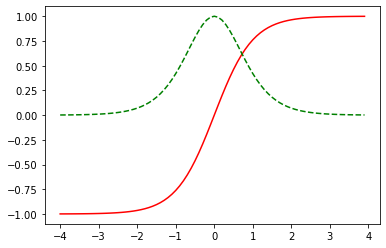

In [5]:
import numpy as np
import matplotlib.pyplot as plt

x=np.arange(-4,4,0.1)


plt.plot(x,np.tanh(x),'r',x,(1-(np.tanh(x)**2)),'g--')
plt.show()

실선은 tanh(x)이고 점선은 tanh(x)의 미분이다. 그 값은 1.0 이하이고 x가 0으로 부터 멀어질 수록 그 값은 작아진다. 그래서 tanh(x)함수를 T번 통과하면 그 기울도 T번 반복해서 줄어든다.

또한 RNN계층의 역전파에서는 matmul도 통과한다. 이때 상류로부터 $dh$라는 기울기 흘러온다고 가정하면 matmul 노드의 역전파는 $dhW_h^T$라는 행렬 곱으로 기울기를 계산한다. 같은 계산을 시계열 데이터의 시간 크기만큼 반복한다. 매번 똑같은 가중치 $W_h$를 사용.
- 그 결과는 행렬의 특잇값이 1보다 크면 '기울기 폭발'을 일으키고 1보다 작으면 '기울기 소실'을 일으킨다.

In [ ]:
# 기울기 폭발의 대책 : 기울기 클리핑

def clip_grads(grads,max_norm):
    total_norm=0
    for grad in grads:
        total_norm+=np.sum(grad**2)
    total_norm=np.sqrt(total_norm)
    
    rate=max_norm/(total_norm+1e-6)
    if rate<1:
        for grad in grads:
            grad*=rate

### LSTM

In [ ]:
class LSTM:
    def __init__(self,Wx,Wh,b):
        self.params=[Wx,Wh,b]
        self.grads=[np.zeros_like(Wx),np.zeros_like(Wh),np.zeros_like(b)]
        self.cache=None
        
    def forward(self,x,h_prev,c_prev):
        Wx,Wh,b=self.params
        N,H=h_prev.shape
        
        A=np.matmul(x,Wx)+np.matmul(h_prev,Wh)+b
        
        f=A[:,:H]
        g=A[:,H:2*H]
        i=A[:,2*H:3*H]
        o=A[:,3*H:]
        
        f=sigmoid(f)
        g=np.tanh(g)
        i=sigmoid(i)
        o=sigmoid(o)
        
        c_next=f*c_prev+g*i
        h_next=o*np.tanh(c_next)
        
        self.cache(x,h_prev,c_prev,i,f,g,o,c_next)
        return h_next,c_next